<a href="https://colab.research.google.com/github/ali-rabiee/Portfolio-Formation/blob/main/Portfolio_Formation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements & Libraries

In [ ]:
# !pip install keras-rl
# !pip install gym
# !pip install rl==2.4
# !pip install keras-rl2
# !pip install Callbacks 
# !pip install callbacks
# !pip install rl.callbacks
# !pip install tf-nightly
!pip install yfinance
!pip install minisom
# !pip uninstall tensorflow --yes
# !pip uninstall keras --yes
# !pip install tensorflow==1.15
# !pip install keras==1.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 12.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel 

# Google Drive Connection

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)
os.chdir('drive/My Drive/Colab Notebooks/DQN')

Mounted at /content/drive/


# Get Data

In [ ]:
# Name of 60 Stocks  
stocks = ['CDEV', 'GILD', 'JBLU', 'HBAN','SLB',
          'CS', 'PLUG', 'USB', 'ABBV','CTRA', 'SIRI',
          'SCHW', 'M', 'FCX', 'MO','UAL', 'ET','KGC',
          'NCLH', 'NKE','ERIC', 'ZNGA','PTON',
          'CLF', 'PYPL', 'MRO','CMCSA', 'INFY',
          'SNAP','TSM', 'CSCO', 'FB', 'UBER', 'OXY',
          'JPM', 'GOLD', 'TSLA', 'BABA', 'NLSN','TLRY',
          'AMC', 'VALE', 'DAL', 'TELL','ITUB', 'PCG','AAL',
          'NVDA', 'WFC', 'AMD', 'AAPL', 'TWTR', 'MRNA',
          'JNJ', 'GOOGL', 'COST', 'WMT']

print(f"Number of Stocks: {len(stocks)}")

Number of Stocks: 57


In [ ]:
from get_stock import get_stock

# Getting Data

start = "2020-07-10"
end = "2022-04-29"

for ticker in stocks:
    # Download datasets
    print(f'### Downloading {ticker}:')
    Hour = get_stock(ticker, start, end, "60m")
    Day = get_stock(ticker, start, end, "1d")
    Week = get_stock(ticker, start, end, "1wk")
    
    # Reset indexes
    Hour.reset_index(drop=True, inplace=True)
    Day.reset_index(drop=True, inplace=True)
    Week.reset_index(drop=True, inplace=True)

    # Save the datasets
    PATH = "datasets/"
    Hour.to_csv(f"{PATH}{ticker}hour.csv")
    Day.to_csv(f"{PATH}{ticker}day.csv")
    Week.to_csv(f"{PATH}{ticker}week.csv")
    

### Downloading CDEV:
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
### Downloading GILD:
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 

/content/get_stock.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
### Downloading CLF:
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
### Downloading PYPL:
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 c

# DQN Model

The code needs three positional parameters to be correctly executed: \\
python main.py [numberOfActions, isOnlyShort, ensembleFolder]


* To run the FULL agent you need to run: python main.py 3 0 ensembleFolder
* To run the ONLY LONG agent you need to run: python main.py 2 0 ensembleFolder
* To run the ONLY SHORT agent you need to run: python main.py 2 1 ensembleFolder \\
where the paramenter ensembleFolder is used to set the name of the folder in which you'll get your results.

In [ ]:
"""Train the DQN Model"""

import keras
import tensorflow as tf
#This is the class call for the Agent which will perform the experiment
from deepQTrading import DeepQTrading

# Date library to manipulate time in the source code
import datetime

# Keras library to define the NN to be used
from keras.models import Sequential

# Layers used in the NN considered
from keras.layers import Dense, Activation, Flatten, Reshape, Lambda

# Activation Layers used in the source code
from keras.layers import LeakyReLU, Input

# Optimizer used in the NN
# from keras.optimizers import Adam

#Libraries used for the Agent considered
from rl.agents.dqn import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import EpsGreedyQPolicy


#Library used for showing the exception in the case of error 
import sys

import pandas as pd
import numpy as np
from evaluation import perc_ensemble, full_ensemble, ensemble


'''
There are three actions possible in the stock market
Hold(id 0): do nothing.
Long(id 1): It predicts that the stock market value will raise at the end of the day. 
So, the action performed in this case is buying at the beginning of the day and sell it at the end of the day (aka long).
Short(id 2): It predicts that the stock market value will decrease at the end of the day.
So, the action that must be done is selling at the beginning of the day and buy it at the end of the day (aka short). 
//////////////////////////////////////////////////////////////
The Model is a simple NN considered. It is composed of:
One flatten layer to get 68 dimensional vectors as input
One dense layer with 35 neurons and LeakyRelu activation
One final Dense Layer with the 3 actions considered
the input is 20 observation days from the past, 8 observations from the past week and 
40 observations from the past hours
//////////////////////////////////////////////////////////////
Define the DeepQTrading class with the following parameters:
explorations: 0.2 operations are random, and 100 epochs.
in this case, epochs parameter is used because the Agent acts on daily basis, so its better to repeat the experiments several
times so, its defined that each epoch will work on the data from training, validation and testing.
trainSize: the size of the train data gotten from the dataset, we are setting 5 stock market years, or 1800 days
validationSize: the size of the validation data gotten from dataset, we are setting 6 stock market months, or 180 days
testSize: the size of the testing data gotten from dataset, we are setting 6 stock market months, or 180 days
outputFile: where the results will be written
begin: where the walks will start from. We are defining January 1st of 2010
end: where the walks will finish. We are defining February 22nd of 2019
nOutput:number of walks
'''
# Set Parameters
nb_actions = 3
isOnlyShort = 0
ensembleFolderName = "ensembleFolder"


model = Sequential()
model.add(Flatten(input_shape=(1, 1, 68)))
model.add(Dense(35,activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(Dense(nb_actions))
model.add(Activation('linear'))


stocks = ['TSM', 'CSCO', 'FB', 'UBER', 'OXY',
          'JPM', 'GOLD', 'TSLA', 'BABA', 'NLSN','TLRY',
          'AMC', 'VALE', 'DAL', 'TELL','ITUB', 'PCG','AAL',
          'NVDA', 'WFC', 'AMD', 'AAPL', 'TWTR', 'MRNA',
          'JNJ', 'GOOGL', 'COST', 'WMT']

for ticker in stocks:

    print(f"\n#### Train {ticker} ####\n")
    # Define the DeepQTrading class
    dqt = DeepQTrading(
        ticker=ticker,
        model=model,
        explorations=[(0.2, 50)],
        trainSize=datetime.timedelta(days=30*19),
        validationSize=datetime.timedelta(days=30*1),
        testSize=datetime.timedelta(days=30*1),
        outputFile="Output/csv/walks/walks",
        begin=datetime.datetime(2020, 6, 30, 0, 0, 0, 0),
        end=datetime.datetime(2022, 4, 1, 0, 0, 0, 0),
        nbActions=nb_actions,
        isOnlyShort=isOnlyShort,
        ensembleFolderName=ensembleFolderName
        )
    numWalks = dqt.run()
    dqt.end()

    # Preparing and saving the results
    numDel = 0
    for j in range(0, numWalks):

        df_test = pd.read_csv("./Output/ensemble/ensembleFolder/walk"+str(j)+f"ensemble_test_{ticker}.csv", index_col='Date')
        df_valid = pd.read_csv("./Output/ensemble/ensembleFolder/walk"+str(j)+f"ensemble_valid_{ticker}.csv", index_col='Date')

        for deleted in range(1, numDel):
            del df_test['iteration'+str(deleted)]
            del df_valid['iteration'+str(deleted)]

        if j == 0:
            fulldf_test = perc_ensemble(df_test)
            fulldf_valid = perc_ensemble(df_valid)

        else:
            fulldf_test = fulldf_test.append(perc_ensemble(df_test))
            fulldf_valid = fulldf_valid.append(perc_ensemble(df_valid))


    metrics_test = ensemble(numWalks, ticker, data_type='test', numDel=5)
    metrics_valid = ensemble(numWalks, ticker, data_type='valid', numDel=5)

    method = "short" if isOnlyShort == 1 else "long"
    method = '3act' if nb_actions == 3 else method 

    # Save Predictions
    PATH = "./Output/results/DQN predictions/"
    fulldf_test.to_csv(f"{PATH}{ticker}_{method}_preds_test.csv")
    fulldf_valid.to_csv(f"{PATH}{ticker}_{method}_preds_valid.csv")

    # Save metrics
    PATH = "./Output/results/DQN metrics/"
    metrics_test.to_csv(f"{PATH}{ticker}_{method}_metrics_test.csv")
    metrics_valid.to_csv(f"{PATH}{ticker}_{method}_metrics_valid.csv")


#### Train TSM ####



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Streaming output truncated to the last 5000 lines.
31 TRAIN:  acc: 0.8181818181818182 cov: 0.9166666666666666 rew: 5.036110755847886
Resetted: episode 13; Index 109 over the limit (109)
Resetted: episode 25; Index 109 over the limit (109)
31 VALID:  acc: 0.5 cov: 1.0 rew: 0.011466030018486905
Resetted: episode 18; Index 153 over the limit (153)
31 TEST:  acc: 0.7727272727272727 cov: 0.9166666666666666 rew: 0.20043926165894177
 
Resetted: episode 386; Index 2719 over the limit (2719)
32 TRAIN:  acc: 0.7761557177615572 cov: 0.9013157894736842 rew: 4.433467148696317
Resetted: episode 13; Index 109 over the limit (109)
Resetted: episode 25; Index 109 over the limit (109)
32 VALID:  acc: 0.5 cov: 1.0 rew: 0.011466030018486905
Resetted: episode 18; Index 153 over the limit (153)
32 TEST:  acc: 0.5416666666666666 cov: 1.0 rew: 0.0856527652054998
 
Resetted: episode 386; Index 2719 over the limit (2719)
33 TRAIN:  acc: 0.7836538461538461 cov: 0.9122807017543859 rew: 4.602879814226012
Resetted:

In [ ]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
flatten_1 (Flatten)              (None, 68)            0           flatten_input_1[0][0]            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 35)            2415        flatten_1[0][0]                  
____________________________________________________________________________________________________
leakyrelu_1 (LeakyReLU)          (None, 35)            0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 3)             108         leakyrelu_1[0][0]                
___________________________________________________________________________________________

## Comparison

In [ ]:
stocks = ['CDEV', 'GILD', 'JBLU', 'HBAN','SLB',
          'CS', 'PLUG', 'USB', 'ABBV','CTRA', 'SIRI',
          'SCHW', 'M', 'FCX', 'MO','UAL', 'ET','KGC',
          'NCLH', 'NKE','ERIC', 'ZNGA','PTON',
          'CLF', 'PYPL', 'MRO','CMCSA', 'INFY',
          'SNAP','TSM', 'CSCO', 'FB', 'UBER', 'OXY',
          'JPM', 'GOLD', 'TSLA', 'BABA', 'NLSN','TLRY',
          'AMC', 'VALE', 'DAL', 'TELL','ITUB', 'PCG','AAL',
          'NVDA', 'WFC', 'AMD', 'AAPL', 'TWTR', 'MRNA',
          'JNJ', 'GOOGL', 'COST', 'WMT']

In [ ]:
import pandas as pd

# Ensemble the actions for only-long and only-short agents

data_type = 'test'

for ticker in stocks:
    # Read the predictions from gdrive 
    preds_long = pd.read_csv(f"./Output/results/DQN predictions/{ticker}_long_preds_{data_type}.csv")
    preds_short = pd.read_csv(f"./Output/results/DQN predictions/{ticker}_short_preds_{data_type}.csv")
    preds_ensemble = []

    # Number of predictions
    N = len(preds_long)

    # Ensemble the only long and only short agents predictions
    for i in range(N):
        if preds_long["ensemble"][i] == 1 and preds_short["ensemble"][i] == 0:
            preds_ensemble.append(1)
        elif preds_long["ensemble"][i] == 0 and preds_short["ensemble"][i] == 2:
            preds_ensemble.append(2)
        else:
            preds_ensemble.append(0) 

    # Create the Dataframe of ensemble predictions
    ensemble_df = preds_long.copy()
    ensemble_df['ensemble'] = preds_ensemble

    # Save 
    PATH = "./Output/results/DQN predictions/"
    ensemble_df.to_csv(f"{PATH}{ticker}_preds_ensemble_{data_type}.csv")

In [ ]:
from evaluation import ensemble

# Calculate the reward of ensemble long and short agents
method = 'ensemble'
for ticker in stocks:
    metrics_test = ensemble(numWalks=1, ticker, data_type='test', use_walks=False)
    metrics_valid = ensemble(numWalks=1, ticker=ticker, data_type='valid', use_walks=False)
    # Save metrics
    PATH = "./Output/results/DQN metrics/"
    metrics_test.to_csv(f"{PATH}{ticker}_{method}_metrics_test.csv")
    metrics_valid.to_csv(f"{PATH}{ticker}_{method}_metrics_valid.csv")

In [ ]:
# Create a csv of Rewards of all datasets with different approaches 
import pandas as pd

data_type = 'valid'
method = 'ensemble'
columns = ["Iteration", "Reward_Long%", "Reward_Short%", "Reward%", "Wins%", "Losses%", "Coverage%", "Accuracy", "Dataset"]
df_metrics = pd.DataFrame(columns=columns)
for ticker in stocks:
    metrics = pd.read_csv(f"./Output/results/DQN metrics/{ticker}_{method}_metrics_{data_type}.csv")
    metrics = metrics.loc[metrics['Iteration']=='sum'] 
    metrics['Dataset'] = ticker
    df_metrics = df_metrics.append(metrics)
    # Drop useless columns columns
    df_metrics = df_metrics.loc[:, ~df_metrics.columns.str.contains('^Unnamed')]
    df_metrics.drop(['Iteration'], axis=1, inplace=True) 
    # Reset index
    df_metrics.reset_index(drop=True, inplace=True)
    col = df_metrics.pop("Dataset")
    df_metrics.insert(0, col.name, col) 

    # Save metrics
    PATH = "./Output/results/DQN metrics/Final results/"
    df_metrics.to_csv(f"{PATH}{method}_metrics_{data_type}.csv")

In [ ]:
###############################################
#     Comparison DQN 3act with ensemble one   #
###############################################

# Regression Models

In [ ]:
import math # Mathematical functions 
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # Additional functions for analysing and manipulating data
from datetime import date, timedelta, datetime # Date Functions
from pandas.plotting import register_matplotlib_converters # This function adds plotting functions for calender dates
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data
import matplotlib.dates as mdates # Formatting dates
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Reshape, Lambda
from keras.layers import LeakyReLU, Input, Dense, GRU, Dropout, LSTM, Layer, BatchNormalization
from keras import initializers, regularizers, constraints
from keras.engine.input_layer import Input
from keras import backend as K
from keras.models import Model
import time
from RegressionModels import evaluate_model, prepare_data, LSTM_model, GRU_model, LSTM_GRU_model
from get_stock import get_stock, get_reward
from feature_eng import get_indicators

In [ ]:
df = pd.read_csv("./Output/results/Regression models predictions/CDEV_gru_True.csv")


df.drop(['Open', 'Close', 'Unnamed: 0'], axis=1, inplace=True) 
rew = df['Reward'].to_list()

for ix, prd in enumerate(rew):
    rew[ix] = 0 if prd < 0 else round(prd, 2)

df['Reward'] = rew
df

In [ ]:
df = pd.read_csv(f'./datasets/CDEVday.csv')
df = get_reward(df)
df = df[(df['Date'] >= '2022-01-21') & (df['Date'] <= '2022-03-23')]
df

In [ ]:
use_indicators = False
look_back = 7
# Do not change the start and end!
start = '2022-01-10'
end = '2022-03-23'

X_train, y_train, X_test, y_test, features_num, scaler_pred = prepare_data(
        df=df,
        predicted_col='Reward',
        start=start,
        end=end,
        look_back=look_back,
        use_indicators=use_indicators)

In [ ]:
len(X_train)

In [ ]:
stocks = ['CDEV', 'GILD', 'JBLU', 'HBAN','SLB',
          'CS', 'PLUG', 'USB', 'ABBV','CTRA', 'SIRI',
          'SCHW', 'M', 'FCX', 'MO','UAL', 'ET','KGC',
          'NCLH', 'NKE','ERIC', 'ZNGA','PTON',
          'CLF', 'PYPL', 'MRO','CMCSA', 'INFY',
          'SNAP','TSM', 'CSCO', 'FB', 'UBER', 'OXY',
          'JPM', 'GOLD', 'TSLA', 'BABA', 'NLSN','TLRY',
          'AMC', 'VALE', 'DAL', 'TELL','ITUB', 'PCG','AAL',
          'NVDA', 'WFC', 'AMD', 'AAPL', 'TWTR', 'MRNA',
          'JNJ', 'GOOGL', 'COST', 'WMT']

In [ ]:
stocks = ['CDEV']

columns = ['Reward']
use_indicators = True
look_back = 7
# Do not change the start and end!
start = '2022-01-10'
end = '2022-03-23'
path = f"./Output/results/Regression models predictions/"

# Get list of Date
df = pd.read_csv(f'./datasets/AAPLday.csv')
df = df[(df['Date'] >= '2022-01-21') & (df['Date'] <= '2022-03-23')]
Date = df['Date'].to_list()

for ticker in stocks:
    # Get data
    st = "2019-05-10"
    df = get_stock(ticker, st, end, "1d")
    df = get_reward(df)
    # Create a DataFrame for Predictions
    df_pred_lstm = pd.DataFrame(columns=['Date'])
    df_pred_gru = pd.DataFrame(columns=['Date'])
    df_pred_lsgr = pd.DataFrame(columns=['Date'])
    df_pred_lstm['Date'] = Date
    df_pred_gru['Date'] = Date
    df_pred_lsgr['Date'] = Date

    for col in columns:
        print(f'\n### ticker: {ticker}, column: {col}')
        
        # Prepare Data for Training Models
        X_train, y_train, X_test, y_test, features_num, scaler_pred = prepare_data(
        df=df,
        predicted_col=col,
        start=start,
        end=end,
        look_back=look_back,
        use_indicators=use_indicators)
        
        # Define models
        lstm = LSTM_model(units=50, input_shape=(X_train.shape[1], features_num+1)).build()
        gru = GRU_model(units=50, input_shape=(X_train.shape[1], features_num+1)).build()
        lsgr = LSTM_GRU_model(units=50, input_shape=(X_train.shape[1], features_num+1)).build()
        
        # Train LSTM model
        print('\nTrain LSTM:\n')
        lstm.fit(X_train, y_train, epochs=200, batch_size=32)
        # Get the predicted values
        y_pred_scaled = lstm.predict(X_test)
        # Unscale the predicted values
        y_pred = scaler_pred.inverse_transform(y_pred_scaled)
        y_test_unscaled = scaler_pred.inverse_transform(np.array(y_test).reshape(-1, 1))
        # Save predictions into Drive
        df_pred_lstm[col] = y_pred
        df_pred_lstm.to_csv(f"{path}{ticker}_lstm_{use_indicators}.csv")

        print('\nTrain GRU:\n')
        gru.fit(X_train, y_train, epochs=200, batch_size=32)
        # Get the predicted values
        y_pred_scaled = gru.predict(X_test)
        # Unscale the predicted values
        y_pred = scaler_pred.inverse_transform(y_pred_scaled)
        y_test_unscaled = scaler_pred.inverse_transform(np.array(y_test).reshape(-1, 1))
        # Save predictions into Drive
        df_pred_gru[col] = y_pred
        df_pred_gru.to_csv(f"{path}{ticker}_gru_{use_indicators}.csv")

        print('\nTrain LSTM-GRU:\n')
        lsgr.fit(X_train, y_train, epochs=200, batch_size=32)
        # Get the predicted values
        y_pred_scaled = lsgr.predict(X_test)
        # Unscale the predicted values
        y_pred = scaler_pred.inverse_transform(y_pred_scaled)
        
        for ix, prd in enumerate(y_pred):
            y_pred[ix] = 0 if prd < 0 else round(prd)

        y_test_unscaled = scaler_pred.inverse_transform(np.array(y_test).reshape(-1, 1))
        # Save predictions into Drive
        df_pred_lsgr[col] = y_pred
        df_pred_lsgr.to_csv(f"{path}{ticker}_lsgr_{use_indicators}.csv")    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

### ticker: COST, column: Reward
dataset size = 717
train size = 667
test size = 50

Train LSTM-GRU:

Epoch 1/500
21/21 [==============================] - 9s 24ms/step - loss: 0.0182
Epoch 2/500
21/21 [==============================] - 0s 22ms/step - loss: 0.0165
Epoch 3/500
21/21 [==============================] - 1s 25ms/step - loss: 0.0160
Epoch 4/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0157
Epoch 5/500
21/21 [==============================] - 0s 22ms/step - loss: 0.0156
Epoch 6/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0164
Epoch 7/500
21/21 [==============================] - 0s 22ms/step - loss: 0.0159
Epoch 8/500
21/21 [==============================] - 1

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


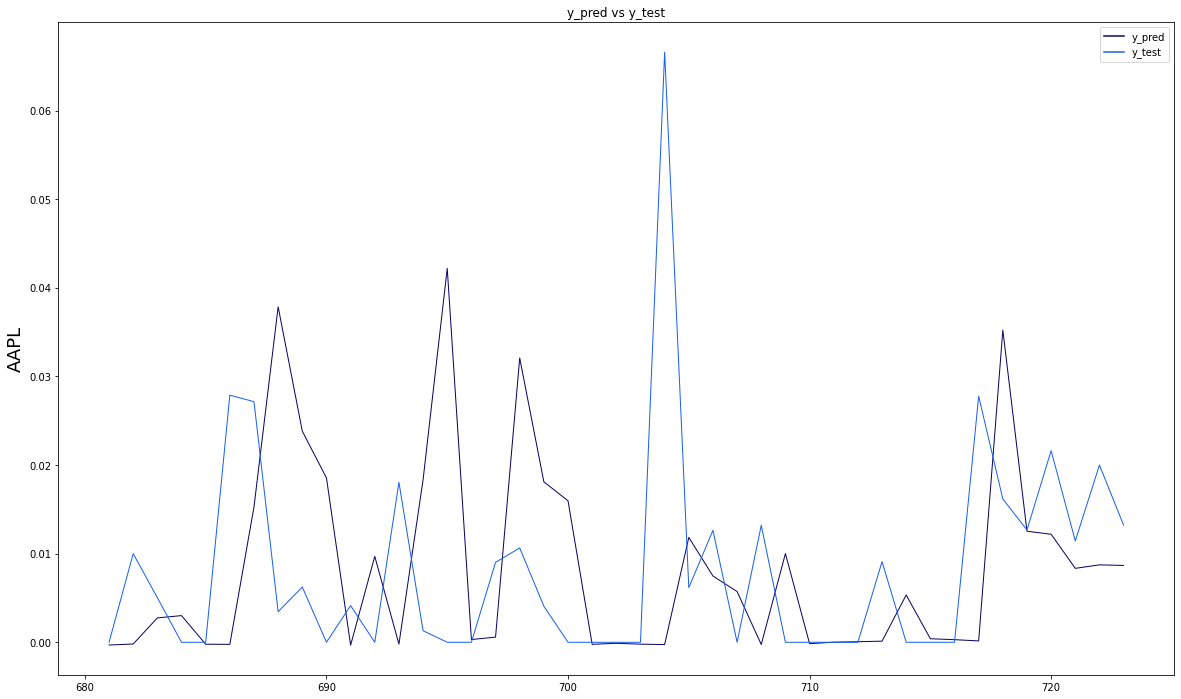

In [ ]:
# Plot

ticker = 'AAPL'
model = 'lsgr'
use_indicators = True
st = "2019-05-10"
start = '2022-01-21'
end = '2022-03-24'
df = get_stock(ticker, st, end, "1d")
df = get_reward(df)
training_size = 421
look_back = 7
y_pred = pd.read_csv(f"Output/results/Regression models predictions/{ticker}_{model}_{use_indicators}.csv")["Reward"].to_list()

training_set = df[df['Date'] < start]
test_set = df[(df['Date'] >= start) & (df['Date'] <= end)]
# Add the difference between the valid and predicted prices
train = pd.DataFrame(training_set['Reward']).rename(columns={'Reward': 'y_train'})
valid = pd.DataFrame(test_set['Reward']).rename(columns={'Reward': 'y_test'})
valid.insert(1, "y_pred", y_pred, True)
valid.insert(1, "residuals", valid["y_pred"] - valid["y_test"], True)
df_union = pd.concat([train, valid])
df_union = valid

# Create the lineplot
fig, ax1 = plt.subplots(figsize=(20, 12))
plt.title("y_pred vs y_test")
plt.ylabel(ticker, fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union[['y_pred', 'y_test']], linewidth=1.0, dashes=False, ax=ax1)

# Create the bar plot with the differences
# df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union["residuals"].dropna()]
# ax1.bar(height=df_union['residuals'].dropna(), x=df_union['residuals'].dropna().index, width=3, label='residuals', color=df_sub)
# plt.legend()
# plt.show()

# Portfolio Selection

In [ ]:
# Name of Stocks  
stocks = ['CDEV', 'GILD', 'JBLU', 'HBAN','SLB',
          'CS', 'PLUG', 'USB', 'ABBV','CTRA', 'SIRI',
          'SCHW', 'M', 'FCX', 'MO','UAL', 'ET','KGC',
          'NCLH', 'NKE','ERIC', 'ZNGA','PTON',
          'CLF', 'PYPL', 'MRO','CMCSA', 'INFY',
          'SNAP','TSM', 'CSCO', 'FB', 'UBER', 'OXY',
          'JPM', 'GOLD', 'TSLA', 'BABA', 'NLSN','TLRY',
          'AMC', 'VALE', 'DAL', 'TELL','ITUB', 'PCG','AAL',
          'NVDA', 'WFC', 'AMD', 'AAPL', 'TWTR', 'MRNA',
          'JNJ', 'GOOGL', 'COST', 'WMT']

print(f"Number of Stocks: {len(stocks)}")

Number of Stocks: 57


In [ ]:
import pandas as pd  

# Extract profitable stocks from validation dataset

prof_stocks = []

for ticker in stocks:
      three_valid = pd.read_csv(f"./Output/results/DQN metrics/{ticker}_3act_metrics_valid.csv")
      # three_test = pd.read_csv(f"./Output/results/DQN metrics/{ticker}_3act_metrics_test.csv")
      ens_valid = pd.read_csv(f"./Output/results/DQN metrics/{ticker}_ensemble_metrics_valid.csv")
      # ens_test = pd.read_csv(f"./Output/results/DQN metrics/{ticker}_ensemble_metrics_test.csv")
      rew_ens = ens_valid['Reward_Long%'][0] 
      rew_three = three_valid['Reward_Long%'][0]

      if rew_three > 0.01:
          prof_stocks.append(ticker)

print(f"Number of Profitable Stocks: {len(prof_stocks)}\n", prof_stocks)



Number of Profitable Stocks: 29
 ['CDEV', 'GILD', 'JBLU', 'SLB', 'PLUG', 'ABBV', 'CTRA', 'SIRI', 'M', 'FCX', 'KGC', 'NCLH', 'PTON', 'PYPL', 'MRO', 'INFY', 'SNAP', 'FB', 'GOLD', 'TSLA', 'VALE', 'TELL', 'ITUB', 'NVDA', 'WFC', 'MRNA', 'JNJ', 'GOOGL', 'COST']


In [ ]:
# Extract Profitable stocks in each day based on DQN prediction

import pandas as pd

data_type = "test"

# Date of the preds
preds = pd.read_csv(f"./Output/results/DQN predictions/{stocks[0]}_preds_ensemble_{data_type}.csv")
Date = preds["Date"].to_list()
portfolio_ensemble = {}
portfolio_3act = {}
 
for date in Date:
    
    profitable_stocks_ensemble = []
    profitable_stocks_3act = []

    for ticker in prof_stocks:
        # Read Predictions
        preds_3act = pd.read_csv(f"./Output/results/DQN predictions/{ticker}_3act_preds_{data_type}.csv")
        preds_ensemble = pd.read_csv(f"./Output/results/DQN predictions/{ticker}_preds_ensemble_{data_type}.csv")

        # Get Predictions
        pred_3act = int(preds_3act[preds_3act["Date"] == date]["ensemble"])
        pred_ensemble = int(preds_ensemble[preds_3act["Date"] == date]["ensemble"])

        if pred_ensemble == 1:
            profitable_stocks_ensemble.append(ticker)

        if pred_3act == 1:
            profitable_stocks_3act.append(ticker)

    portfolio_ensemble[date] = profitable_stocks_ensemble
    portfolio_3act[date] = profitable_stocks_3act

daily_prof_stocks_DQN = portfolio_3act 
print(daily_prof_stocks_DQN)

{'2022-02-22': [], '2022-02-23': [], '2022-02-24': [], '2022-02-25': [], '2022-02-28': [], '2022-03-01': ['GILD', 'JBLU', 'SLB', 'ABBV', 'CTRA', 'SIRI', 'FCX', 'INFY', 'FB', 'GOLD', 'VALE', 'TELL', 'ITUB', 'NVDA', 'JNJ'], '2022-03-02': ['CDEV', 'GILD', 'JBLU', 'ABBV', 'SIRI', 'KGC', 'NCLH', 'FB', 'TELL', 'ITUB', 'NVDA', 'JNJ'], '2022-03-03': ['CDEV', 'GILD', 'JBLU', 'SLB', 'SIRI', 'PYPL', 'GOLD', 'JNJ'], '2022-03-04': ['CDEV', 'JBLU', 'PLUG', 'CTRA', 'SIRI', 'PYPL', 'FB', 'TELL', 'JNJ', 'COST'], '2022-03-07': ['CDEV', 'GILD', 'SLB', 'CTRA', 'SIRI', 'NCLH', 'JNJ', 'GOOGL', 'COST'], '2022-03-08': ['JBLU', 'PLUG', 'ABBV', 'CTRA', 'M', 'PYPL', 'INFY', 'FB', 'ITUB', 'NVDA', 'JNJ', 'GOOGL'], '2022-03-09': ['CDEV', 'GILD', 'JBLU', 'ABBV', 'M', 'PYPL', 'INFY', 'SNAP', 'VALE', 'MRNA', 'JNJ', 'GOOGL', 'COST'], '2022-03-10': ['JBLU', 'SLB', 'NCLH', 'INFY', 'SNAP', 'GOLD', 'TSLA', 'ITUB', 'NVDA', 'WFC', 'JNJ', 'GOOGL'], '2022-03-11': ['CDEV', 'GILD', 'ABBV', 'CTRA', 'FB', 'COST'], '2022-03-14': ['

## Correlation

In [ ]:
from clustering import calculate_correlation, visualize_clusters
import datetime

# Calculate the correlation of time series from the base for last num days
base = "2022-03-23"
base = datetime.datetime.strptime(base, '%Y-%m-%d')
numdays = 30
som_x, som_y, win_map, clusters = calculate_correlation(base, numdays)

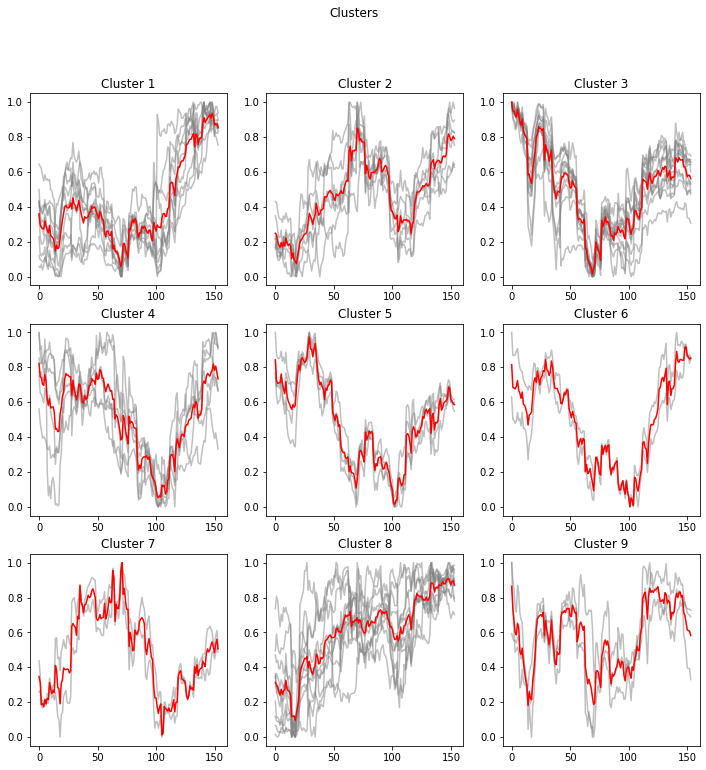

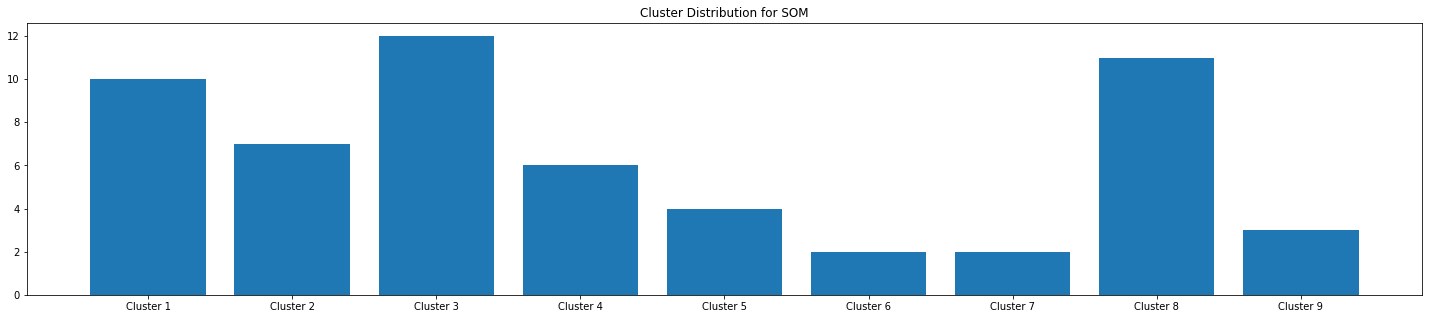

In [ ]:
# Visualization
visualize_clusters(som_x, som_y, win_map)

In [ ]:
# Remove clusters 8 and 9
# clusters = clusters.loc[clusters['Cluster']!='Cluster 8']
# clusters = clusters.loc[clusters['Cluster']!='Cluster 9']
# clusters

In [ ]:
series_clusters = []
for i in range(1, 8):
    series_clusters.append(clusters.loc[clusters['Cluster'] == f'Cluster {i}'].index.to_list())

In [ ]:
series_clusters

[['MRNA',
  'PCG',
  'NLSN',
  'NVDA',
  'TSLA',
  'TWTR',
  'PYPL',
  'GOOGL',
  'M',
  'SCHW',
  'ITUB',
  'ABBV'],
 ['CTRA', 'VALE', 'GOLD', 'SIRI', 'MRO', 'PLUG'],
 ['SLB'],
 ['OXY', 'COST', 'CLF', 'INFY', 'WMT', 'JNJ', 'KGC', 'TELL'],
 ['GILD'],
 ['FCX', 'MO', 'ZNGA', 'CMCSA', 'CSCO'],
 ['CS',
  'WFC',
  'TSM',
  'JPM',
  'UAL',
  'NCLH',
  'HBAN',
  'JBLU',
  'AAL',
  'ERIC',
  'DAL',
  'USB']]

In [ ]:
# Remove the stocks that are not in the profitable stocks 

prof_series = []

for lst in series_clusters:
    for ticker in lst:
        if ticker not in prof_stocks:
            lst.remove(ticker)
    prof_series.append(lst)
    
prof_series

[['MRNA', 'NLSN', 'NVDA', 'TSLA', 'PYPL', 'GOOGL', 'M', 'ITUB', 'ABBV'],
 ['CTRA', 'VALE', 'GOLD', 'SIRI', 'MRO', 'PLUG'],
 ['SLB'],
 ['COST', 'INFY', 'JNJ', 'KGC', 'TELL'],
 ['GILD'],
 ['FCX', 'ZNGA', 'CSCO'],
 ['WFC', 'JPM', 'NCLH', 'JBLU', 'ERIC', 'USB']]

In [ ]:
for lst in prof_series:
    if len(lst) < 2:
        prof_series.remove(lst)

prof_series

[['MRNA', 'NLSN', 'NVDA', 'TSLA', 'PYPL', 'GOOGL', 'M', 'ITUB', 'ABBV'],
 ['CTRA', 'VALE', 'GOLD', 'SIRI', 'MRO', 'PLUG'],
 ['COST', 'INFY', 'JNJ', 'KGC', 'TELL'],
 ['FCX', 'ZNGA', 'CSCO'],
 ['WFC', 'JPM', 'NCLH', 'JBLU', 'ERIC', 'USB']]

## Selection based on Rewards

In [ ]:
# Get list of Date
df = pd.read_csv(f'./datasets/AAPLday.csv')
df = df[(df['Date'] >= '2022-02-22') & (df['Date'] <= '2022-03-23')]
Date = df['Date'].to_list()

portfolio = {}
for date in Date:
    portfo = [] # list of best stocks of each cluster
    for lst in prof_series:
        max_rew = 0 # maximum reward among all stocks of each cluster
        max_ticker = None # the ticker with the highest return
        for ticker in lst:
            if ticker not in daily_prof_stocks_DQN[date]:
                continue
            reg_pred = pd.read_csv(f"./Output/results/Regression models predictions/{ticker}_lsgr_True.csv")
            reg_pred = reg_pred[reg_pred['Date'] == date]
            reg_pred.reset_index(drop=True, inplace=True)
            if reg_pred['Reward'][0] > max_rew:
                max_rew = reg_pred['Reward'][0]
                max_ticker = ticker
        if max_ticker != None:
            portfo.append([max_ticker, max_rew])
    portfolio[date] = portfo


In [ ]:
portfolio

{'2022-02-22': [],
 '2022-02-23': [],
 '2022-02-24': [],
 '2022-02-25': [],
 '2022-02-28': [],
 '2022-03-01': [['ABBV', 0.02],
  ['SIRI', 0.02],
  ['TELL', 0.05],
  ['FCX', 0.01],
  ['JBLU', 0.01]],
 '2022-03-02': [['KGC', 0.32]],
 '2022-03-03': [['PYPL', 0.04], ['GOLD', 0.04], ['JNJ', 0.02]],
 '2022-03-04': [['CTRA', 0.02], ['COST', 0.02]],
 '2022-03-07': [['SIRI', 0.02], ['COST', 0.01]],
 '2022-03-08': [['INFY', 0.03]],
 '2022-03-09': [['PYPL', 0.05], ['INFY', 0.01], ['JBLU', 0.06]],
 '2022-03-10': [['TSLA', 0.04], ['GOLD', 0.05], ['INFY', 0.02], ['NCLH', 0.1]],
 '2022-03-11': [['ABBV', 0.02], ['COST', 0.03]],
 '2022-03-14': [['ABBV', 0.01], ['TELL', 0.13], ['FCX', 0.02]],
 '2022-03-15': [['M', 0.04], ['COST', 0.01], ['WFC', 0.01]],
 '2022-03-16': [['CTRA', 0.01], ['JBLU', 0.04]],
 '2022-03-17': [['ABBV', 0.02],
  ['PLUG', 0.05],
  ['TELL', 0.03],
  ['JBLU', 0.06]],
 '2022-03-18': [['MRNA', 0.05], ['TELL', 0.01], ['JBLU', 0.01]],
 '2022-03-21': [['TSLA', 0.02], ['MRO', 0.02]],
 '2022

In [ ]:
# Normalize weights

for date, lst in portfolio.items():
    rewards = []
    norm_rewards = []
    tickers = []
    sum = 0
    for sublst in lst:
        tickers.append(sublst[0])
        rewards.append(sublst[1])
        sum += sublst[1]
    
    for i in rewards:
        norm_rew = round((i / sum), 2)
        norm_rewards.append(norm_rew)
    
    portfolio[date] = list(zip(tickers, norm_rewards))


In [ ]:
portfolio

{'2022-02-22': [],
 '2022-02-23': [],
 '2022-02-24': [],
 '2022-02-25': [],
 '2022-02-28': [],
 '2022-03-01': [('ABBV', 0.18),
  ('SIRI', 0.18),
  ('TELL', 0.45),
  ('FCX', 0.09),
  ('JBLU', 0.09)],
 '2022-03-02': [('KGC', 1.0)],
 '2022-03-03': [('PYPL', 0.4), ('GOLD', 0.4), ('JNJ', 0.2)],
 '2022-03-04': [('CTRA', 0.5), ('COST', 0.5)],
 '2022-03-07': [('SIRI', 0.67), ('COST', 0.33)],
 '2022-03-08': [('INFY', 1.0)],
 '2022-03-09': [('PYPL', 0.42), ('INFY', 0.08), ('JBLU', 0.5)],
 '2022-03-10': [('TSLA', 0.19), ('GOLD', 0.24), ('INFY', 0.1), ('NCLH', 0.48)],
 '2022-03-11': [('ABBV', 0.4), ('COST', 0.6)],
 '2022-03-14': [('ABBV', 0.06), ('TELL', 0.81), ('FCX', 0.12)],
 '2022-03-15': [('M', 0.67), ('COST', 0.17), ('WFC', 0.17)],
 '2022-03-16': [('CTRA', 0.2), ('JBLU', 0.8)],
 '2022-03-17': [('ABBV', 0.12),
  ('PLUG', 0.31),
  ('TELL', 0.19),
  ('JBLU', 0.38)],
 '2022-03-18': [('MRNA', 0.71), ('TELL', 0.14), ('JBLU', 0.14)],
 '2022-03-21': [('TSLA', 0.5), ('MRO', 0.5)],
 '2022-03-22': [('GO

# Trading

In [ ]:
def trade(df, date, initial_capital, long=True):

    capital = initial_capital
    stock = initial_capital / df["Open"][0]
    gain = 0

    local_df = df[df['Date'] == date]
    local_df.reset_index(drop=True, inplace=True)

    close = local_df['Close'][0]
    open = local_df['Open'][0]
    # date = actions.loc[:, 'Date'].tolist()
    # open = local_df.loc[:, 'Open'].tolist()
    # close = local_df.loc[:, 'Close'].tolist()
    # actions = actions.loc[:, 'ensemble'].tolist()
    # capital_list = []
    # gain_list = []

    if long:
        stock_temp = capital / open
        capital = round((stock_temp * close), 2)

    else:
        capital_temp = stock * open
        stock = capital_temp / close
        capital = round((stock * close), 2)

    return capital

In [ ]:
# from Trading_Metrics import trade, metrics

returns = {}
total_ret = 0
initial_capital = 1e6

for date, portfo in portfolio.items():
    ret = 0
    # initial_capital = 1e6

    if not portfo: # list is empty
        continue 

    for item in portfo:
        ticker = item[0]
        weight = item[1]
        capital = weight * initial_capital
        df = pd.read_csv(f"./datasets/{ticker}day.csv")
        ret += trade(df, date, capital, long=True)
    
    # Save the daily return
    returns[date] = round(ret, 2)
    initial_capital = round(ret, 2)


# Update the total ret
# total_ret += round(ret, 2) - initial_capital
# initial_capital = initial_capital + ret

returns

{'2022-03-01': 992283.49,
 '2022-03-02': 1060381.36,
 '2022-03-03': 1046002.23,
 '2022-03-04': 1073956.14,
 '2022-03-07': 1105514.61,
 '2022-03-08': 1137198.21,
 '2022-03-09': 1149339.29,
 '2022-03-10': 1189095.04,
 '2022-03-11': 1175971.49,
 '2022-03-14': 1096336.97,
 '2022-03-15': 1146749.78,
 '2022-03-16': 1195453.15,
 '2022-03-17': 1246646.62,
 '2022-03-18': 1273407.63,
 '2022-03-21': 1312559.21,
 '2022-03-22': 1348883.27,
 '2022-03-23': 1358888.28}

In [ ]:
last_date = '2022-03-23'
initial_capital = 1e6
total_ret = returns[last_date] - initial_capital
total_ret

358888.28

In [ ]:
rate_of_ret = (total_ret / 1e6) * 100
rate_of_ret

35.888828000000004

In [ ]:
ticker = 'GOOGL'
df = pd.read_csv(f"./datasets/{ticker}day.csv")

df = df[(df['Date'] >= '2022-02-22') & (df['Date'] <= '2022-03-23')]
df

,Unnamed: 0,Date,Time,Datetime,Open,High,Low,Close,Adj Close,Volume
408,408,2022-02-22,00:00,2022-02-22,2596.760010,2643.610107,2564.469971,2596.270020,2596.270020,2249500
409,409,2022-02-23,00:00,2022-02-23,2632.969971,2641.020020,2550.550049,2551.760010,2551.760010,1639300
410,410,2022-02-24,00:00,2022-02-24,2499.070068,2660.000000,2499.070068,2653.820068,2653.820068,2722800
411,411,2022-02-25,00:00,2022-02-25,2671.040039,2705.429932,2635.030029,2689.189941,2689.189941,1820300
412,412,2022-02-28,00:00,2022-02-28,2661.000000,2715.030029,2651.850098,2701.139893,2701.139893,1943200
413,413,2022-03-01,00:00,2022-03-01,2697.570068,2725.110107,2664.370117,2681.229980,2681.229980,1324800
414,414,2022-03-02,00:00,2022-03-02,2692.560059,2705.250000,2661.429932,2691.429932,2691.429932,1176000
415,415,2022-03-03,00:00,2022-03-03,2720.199951,2728.790039,2660.510010,2677.989990,2677.989990,1230200
416,416,2022-03-04,00:00,2022-03-04,2658.550049,2677.030029,2606.750000,2638.129883,2638.129883,1521500
417,417,2022-03-07,00:00,2022-03-07,2629.760010,2634.699951,2525.899902,2527.570068,2527.570068,2255600


In [ ]:
df.tail()

,Unnamed: 0,Date,Time,Datetime,Open,High,Low,Close,Adj Close,Volume
450,450,2022-04-22,00:00,2022-04-22,166.460007,167.869995,161.500000,161.789993,161.789993,84882400
451,451,2022-04-25,00:00,2022-04-25,161.119995,163.169998,158.460007,162.880005,162.880005,96046400
452,452,2022-04-26,00:00,2022-04-26,162.250000,162.339996,156.720001,156.800003,156.800003,95623200
453,453,2022-04-27,00:00,2022-04-27,155.910004,159.789993,155.380005,156.570007,156.570007,88063200
454,454,2022-04-28,00:00,2022-04-28,159.250000,164.520004,158.929993,163.639999,163.639999,130216800
